# Discussion 10 - Logistic Regression & Regularization


In [2]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

Logistic regression is concerned with estimating a probability.


The formula for logistic regression is:
 
$$ P(Y=1) = \frac{e^{(\beta_0 + \beta_1X)}}{1 + e^{(\beta_0 + \beta_1X)}} $$

Where:
- $ P(Y=1) $ is the probability of the dependent variable being 1
- $ e $ is the base of the natural logarithm
- $ b_0 $ is the intercept
- $ b_1 $ is the coefficient for the predictor variable
- $ X $ is the predictor variable

We basically try to find the set of parameters $\beta_0$ and $\beta_1$ that **maximize** the probability of observing our data. So, we fit the model using Maximum Likelihood.

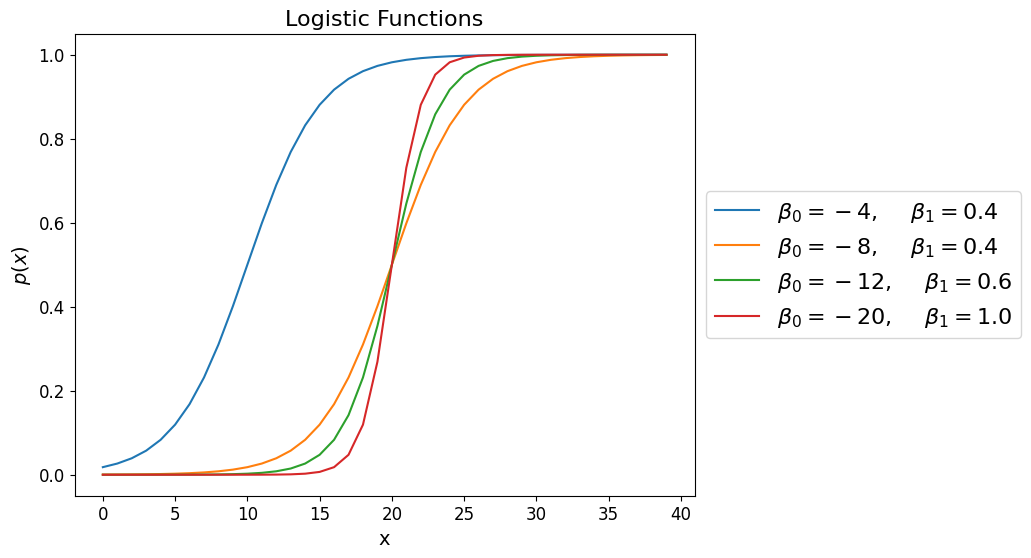

In [3]:
import numpy as np
import matplotlib.pyplot as plt

alphas = [-4, -8,-12,-20]
betas = [0.4,0.4,0.6,1]
x = np.arange(40)
fig = plt.figure(figsize=(8, 6)) 
ax = plt.subplot(111)

for i in range(len(alphas)):
    a = alphas[i]
    b = betas[i]
    y = np.exp(a+b*x)/(1+np.exp(a+b*x))
#     plt.plot(x,y,label=r"$\frac{e^{%d + %3.1fx}}{1+e^{%d + %3.1fx}}\;\beta_0=%d, \beta_1=%3.1f$" % (a,b,a,b,a,b))
    ax.plot(x,y,label=r"$\beta_0=%d,$    $\beta_1=%3.1f$" % (a,b))
ax.tick_params(labelsize=12)
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('$p(x)$', fontsize = 14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})
ax.set_title('Logistic Functions', fontsize = 16);

## Visualized

Intercept (β₀): -6.504
Coefficient (β₁): 1.181


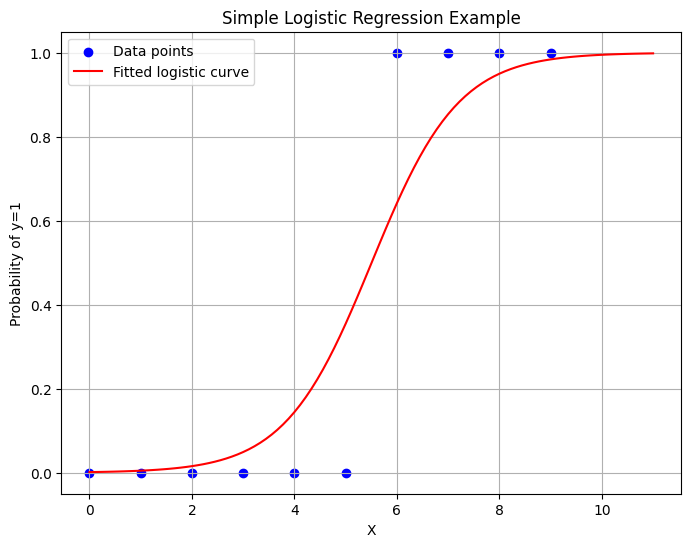

In [4]:
# Create a simple dataset
X = np.arange(10).reshape(-1, 1)
y = np.array([1 if x > 5 else 0 for x in X])

# Import and fit logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

# Print the model parameters
print(f"Intercept (β₀): {model.intercept_[0]:.3f}")
print(f"Coefficient (β₁): {model.coef_[0][0]:.3f}")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')

# Generate points for the fitted curve
X_test = np.linspace(0, 11, 100).reshape(-1, 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

plt.plot(X_test, y_pred_proba, color='red', label='Fitted logistic curve')
plt.xlabel('X')
plt.ylabel('Probability of y=1')
plt.title('Simple Logistic Regression Example')
plt.legend()
plt.grid(True)
plt.show()



## Binary Classification in Practice

In [5]:
import pandas as pd
df=pd.read_csv('./Social Network Ads.csv')
print(df['Purchased'].value_counts())
df.head()

Purchased
0    257
1    143
Name: count, dtype: int64


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Accuracy: 0.65

Confusion Matrix:


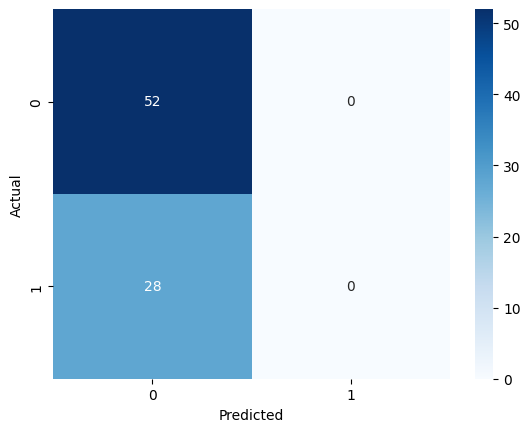


Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80


Metrics Explanation:
1. Accuracy: Proportion of correct predictions (both true positives and true negatives)
2. Confusion Matrix: Shows true positives, false positives, true negatives, and false negatives
3. Precision: Proportion of positive predictions that were actually positive
4. Recall: Proportion of actual positives that were correctly identified
5. F1 Score: Harmonic mean of precision and recall


/Users/faridkarimli/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faridkarimli/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faridkarimli/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns

X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Convert categorical variables to numerical
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate precision, recall, and F1 score
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Print explanation of metrics
print("\nMetrics Explanation:")
print("1. Accuracy: Proportion of correct predictions (both true positives and true negatives)")
print("2. Confusion Matrix: Shows true positives, false positives, true negatives, and false negatives")
print("3. Precision: Proportion of positive predictions that were actually positive")
print("4. Recall: Proportion of actual positives that were correctly identified")
print("5. F1 Score: Harmonic mean of precision and recall")

### Regularization in Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l2 = LogisticRegression(penalty='l2')

model_l1.fit(X, y)
model_l2.fit(X, y)

print("L1 Coefficients:", model_l1.coef_)
print("L2 Coefficients:", model_l2.coef_)

L1 Coefficients: [[1.06856494e-01 1.93379112e-01 2.97295636e-05]]
L2 Coefficients: [[-1.31721757e-10 -2.10415187e-09 -2.69301405e-06]]


1.	Coefficient Shrinkage:
	- L2 Regularization (Ridge) penalizes large coefficients by shrinking them closer to zero, but it doesn’t set them exactly to zero. This keeps all features in the model but reduces their influence if they’re not strongly predictive.
	- L1 Regularization (Lasso) applies a stronger penalty on the coefficients, encouraging some to become exactly zero. This effectively removes some features, which simplifies the model and can improve interpretability by focusing on the most important features.
2.	Feature Selection:

	- By zeroing out certain coefficients, L1 regularization performs an automatic feature selection. This is useful in cases where there are many features, as it helps isolate the ones most predictive of the outcome.
	- L2 regularization, while not selecting features by zeroing them out, can still improve stability by balancing the influence of each feature.
3.	Impact on Model Complexity and Overfitting:
	- Both types of regularization reduce the model’s complexity, which can prevent overfitting, especially in situations with limited data. Overfitting typically happens when the model captures too much noise in the training data; regularization helps the model generalize better by simplifying it.